# Using the IceNet API for historic forecasts
This notebook will explain how to retrieve historic `IceNet` data from the public API and display it locally.

In [1]:
# Import required modules
import datetime
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Set the base URL for API requests
api_base_url = "https://app-icenetgeoapi-pygeoapi.azurewebsites.net/"

Let's see how the prediction for a particular cell changes over time. First, let's identify a cell in the Bering Sea (close to 53, -170).

In [3]:
response = requests.get(f"{api_base_url}/collections/north_forecasts_historic/items?bbox=-170.1,52.9,-169.9,53.1")

In [4]:
cell_id = response.json()["features"][0]["properties"]["cell_id"]
print(cell_id)

80840


In [5]:
# Retrieve the cell
response = requests.get(f"{api_base_url}/collections/north_cells/items?cell_id={cell_id}")
geodata = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

<AxesSubplot:>

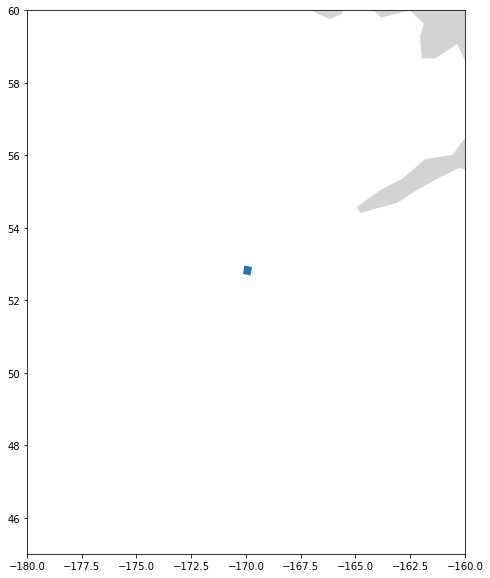

In [6]:
# Let's take a look at where this is on a world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, axes = plt.subplots(1, figsize=(12, 10))
axes.set(xlim=(-180, -160), ylim=(45, 60))
world.plot(ax=axes, color="lightgray")
geodata.plot(ax=axes)

Now let's pick our target date - we'll use today.

In [7]:
# Set the target date
target_date = datetime.datetime.today().date()
print(target_date)

2022-02-18


We'll use the following options in our query:
- `cell_id` set to the `cell_id` we identified above
- `date_forecast_for` set to our `target_date`
- `sortby` set to `date_forecast_generated` so that we get results in ascending order of date
- `limit` set to 1000 so that we get all available forecasts

In [8]:
response = requests.get(f"{api_base_url}/collections/north_forecasts_historic/items?cell_id={cell_id}&date_forecast_for={target_date}&sortby=date_forecast_generated&limit=1000")

# Load data and plot it
Let's load our data into `GeoPandas` and look at it

In [9]:
# Look at the first few rows of data
geodata = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")
geodata.head()

,geometry,forecast_id,date_forecast_generated,date_forecast_for,cell_id,sea_ice_concentration_mean,sea_ice_concentration_stddev
0,"POLYGON ((-169.78913 52.68087, -170.13419 52.7...",2227117,2022-01-03,2022-02-18,80840,1.0,0.0
1,"POLYGON ((-169.78913 52.68087, -170.13419 52.7...",19583148,2022-01-04,2022-02-18,80840,1.0,0.0
2,"POLYGON ((-169.78913 52.68087, -170.13419 52.7...",36939179,2022-01-05,2022-02-18,80840,1.0,0.0
3,"POLYGON ((-169.78913 52.68087, -170.13419 52.7...",54295210,2022-01-06,2022-02-18,80840,1.0,0.0
4,"POLYGON ((-169.78913 52.68087, -170.13419 52.7...",71651241,2022-01-07,2022-02-18,80840,1.0,0.0


And now let's plot it with `matplotlib`

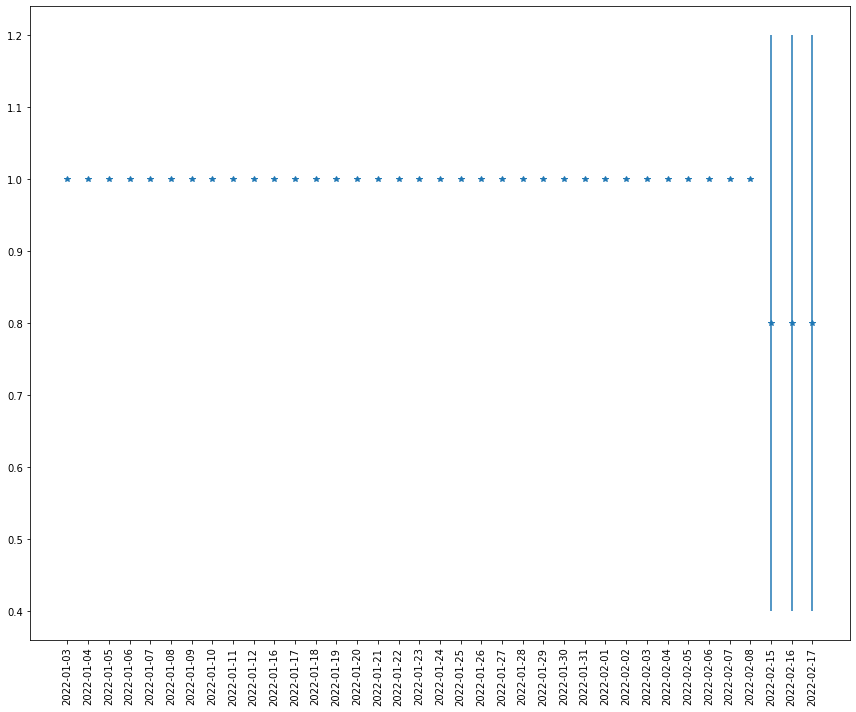

In [10]:
# Plot the data
fig, axes = plt.subplots(1, figsize=(12,10))
plt.errorbar(
    geodata["date_forecast_generated"],
    geodata["sea_ice_concentration_mean"],
    yerr=geodata["sea_ice_concentration_stddev"],
    marker="*",
    linestyle="None"
)
plt.xticks(rotation=90)
plt.tight_layout()

You have now succesfully retrieved historic `IceNet` forecasts from our API and plotted them. 🎉